# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
## Code to import the data
data = pd.read_csv('stock_data.csv')

## Data Overview

- Observations
- Sanity checks

In [4]:
# checking shape of the data
data.shape

(340, 15)

In [5]:
data.sample(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
138,GD,General Dynamics,Industrials,Aerospace & Defense,137.360001,-0.463767,0.939544,28,22,-1603000000,2965000000,9.23,321235102.9,14.881907,4.242998
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,421897810.2,18.456543,-3.022649
113,ES,Eversource Energy,Utilities,MultiUtilities,51.070000,0.709921,1.232829,8,1,-14756000,878485000,2.77,317142599.3,18.436823,-1.169833
302,UDR,UDR Inc,Real Estate,Residential REITs,37.570000,8.583821,1.157906,12,47,-8482000,340383000,1.30,261833076.9,28.900000,-3.089477
268,RSG,Republic Services Inc,Industrials,Industrial Conglomerates,43.990002,6.745943,0.839821,10,2,-42800000,749900000,2.14,350420560.7,20.556076,-2.428225
32,APH,Amphenol Corp,Information Technology,Electronic Components,52.230000,2.693667,1.007762,24,175,768300000,763500000,2.47,309109311.7,21.145749,8.202923
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
24,AMP,Ameriprise Financial,Financials,Asset Management & Custody Banks,106.419998,-2.420686,1.222260,22,67,-281000000,1562000000,8.60,181627907.0,12.374418,-13.398380
255,PPG,PPG Industries,Materials,Diversified Chemicals,98.820000,19.160738,1.533003,28,31,625000000,1406000000,5.18,271428571.4,19.077220,-0.593158
111,EQR,Equity Residential,Real Estate,REITs,81.589996,8.037605,1.056186,8,47,2196000,870120000,2.37,367139240.5,34.426159,-1.269332


In [6]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [7]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,PNW,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,O'Reilly Automotive,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


In [8]:
# checking for duplicate values
data.duplicated().sum() ## Complete the code to get total number of duplicate values

0

In [9]:
# checking for missing values in the data
data.isna().sum() ## Complete the code to check the missing values in the data

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [10]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [11]:
df.sample(5)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
114,ESS,"Essex Property Trust, Inc.",Real Estate,Residential REITs,239.410004,6.765073,1.118425,4,47,4073000,232120000,3.50,6.632000e+07,68.402858,-3.089477
330,XL,XL Capital,Financials,Property & Casualty Insurance,39.180000,7.696534,0.991011,10,99,734422000,1201560000,4.22,2.847299e+08,9.284360,-7.762677
12,AIZ,Assurant Inc,Financials,Multi-line Insurance,80.540001,1.897773,1.112604,3,99,-30351000,141555000,2.08,6.805529e+07,38.721154,-4.072615
290,TGNA,"Tegna, Inc.",Consumer Discretionary,Publishing,25.520000,13.624226,1.797269,21,21,10716000,459522000,2.04,2.252559e+08,12.509804,-12.726553
175,JEC,Jacobs Engineering Group,Industrials,Industrial Conglomerates,41.950001,11.539484,1.732990,7,23,-271788000,302971000,2.42,1.251946e+08,17.334711,6.294943


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

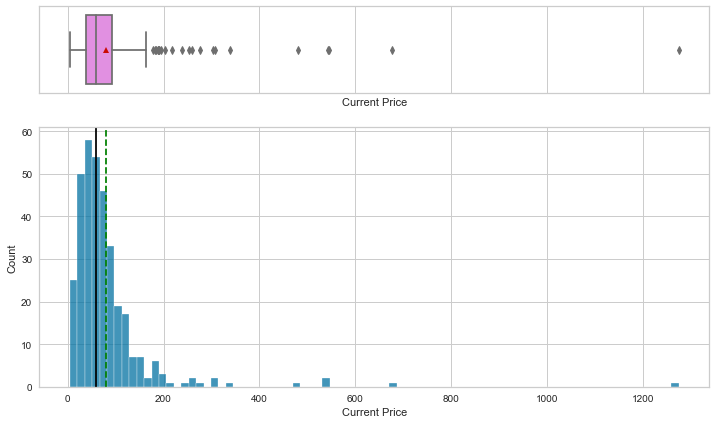

In [13]:
histogram_boxplot(df, 'Current Price')

**`Price Change`**

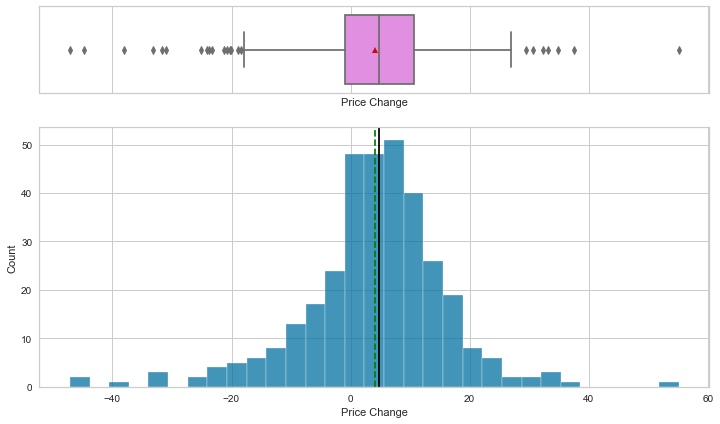

In [14]:
histogram_boxplot(df, 'Price Change')

**`Volatility`**

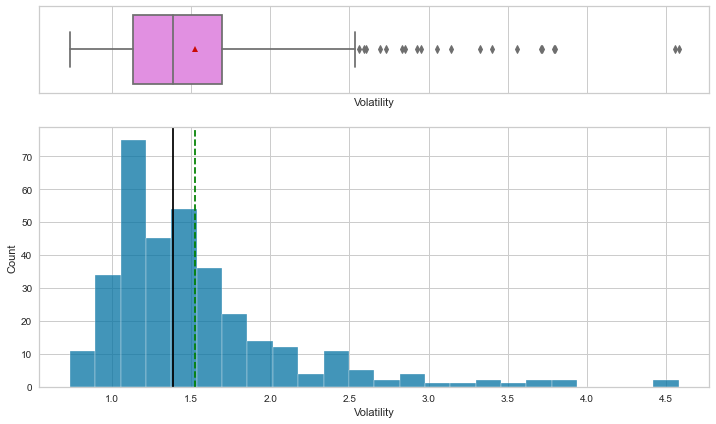

In [15]:
histogram_boxplot(df, 'Volatility')

**`ROE`**

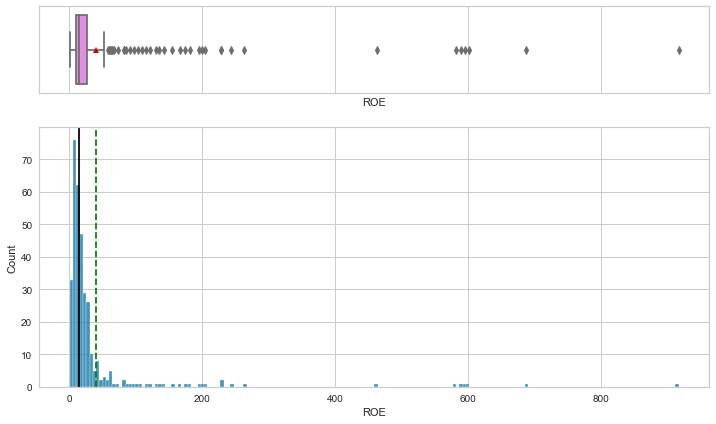

In [16]:
histogram_boxplot(df, 'ROE')

**`Cash Ratio`**

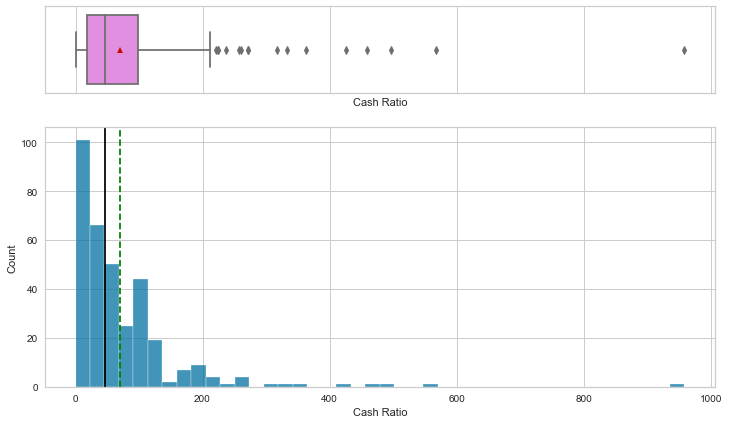

In [17]:
histogram_boxplot(df, 'Cash Ratio')

**`Net Cash Flow`**

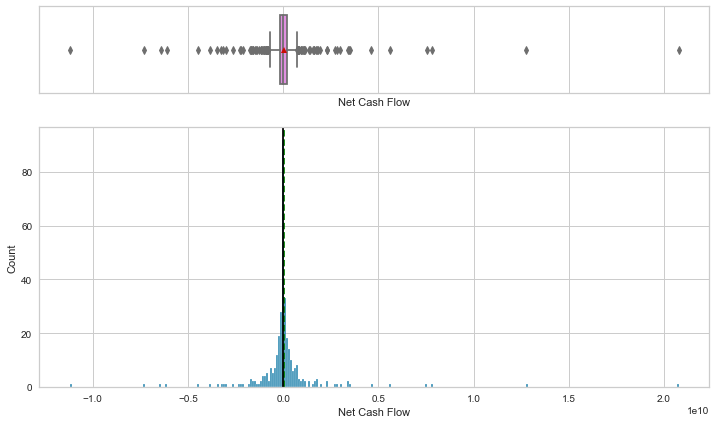

In [18]:
histogram_boxplot(df, 'Net Cash Flow')

**`Net Income`**

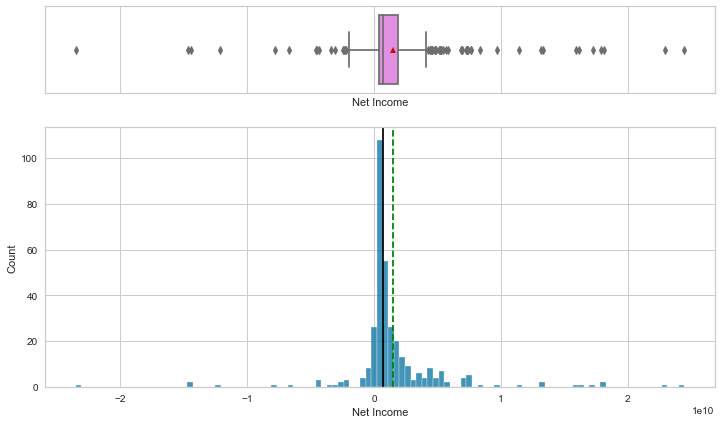

In [19]:
histogram_boxplot(df, 'Net Income')

**`Earnings Per Share`**

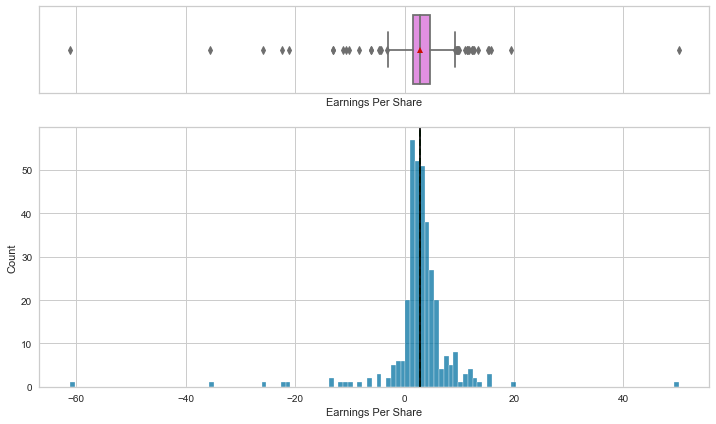

In [20]:
histogram_boxplot(df, 'Earnings Per Share')

**`Estimated Shares Outstanding`**

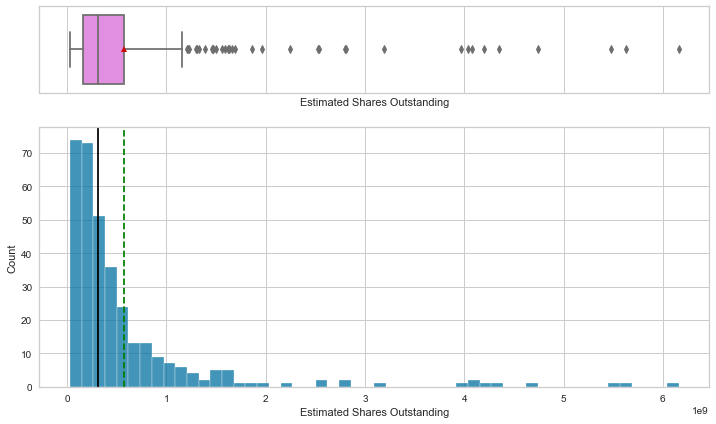

In [21]:
histogram_boxplot(df, 'Estimated Shares Outstanding')

**`P/E Ratio`**

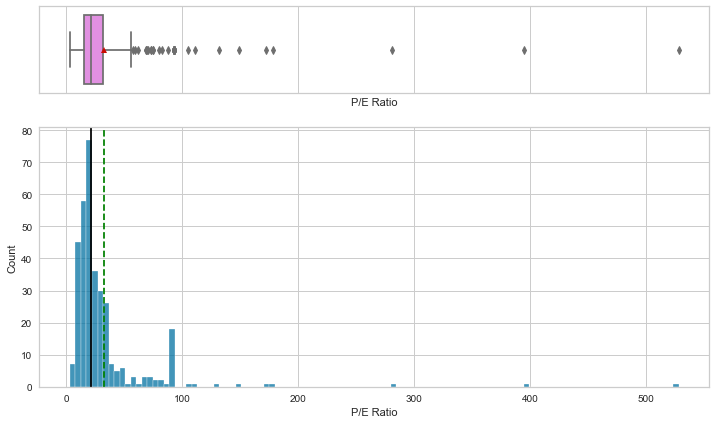

In [22]:
histogram_boxplot(df, 'P/E Ratio')

**`P/B Ratio`**

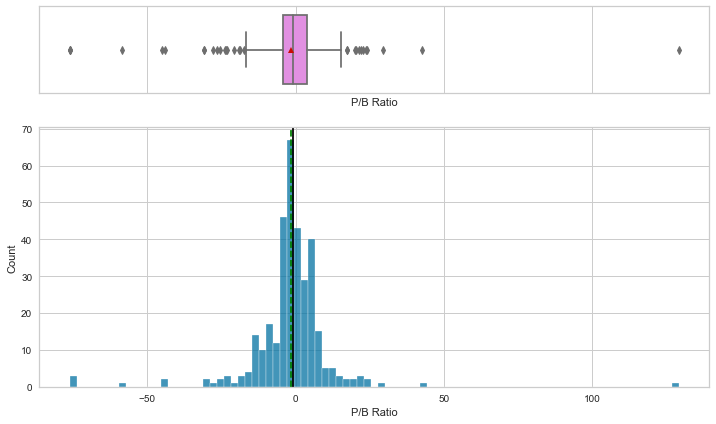

In [23]:
histogram_boxplot(df, 'P/B Ratio')

In [24]:
# function to create labeled barplots

def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

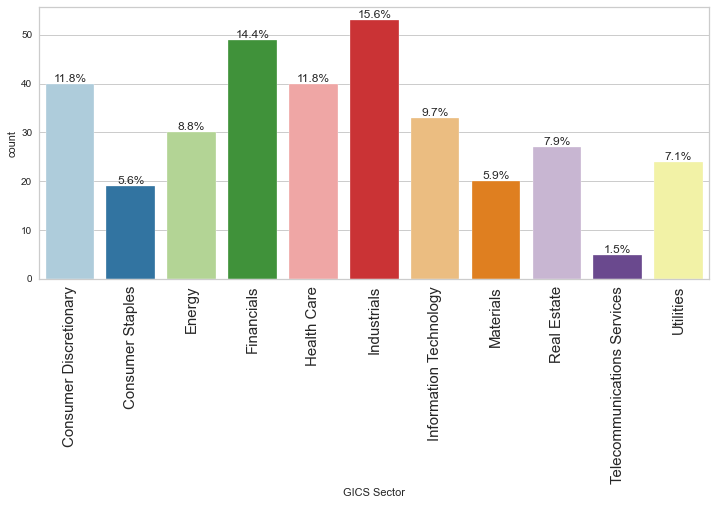

In [25]:
labeled_barplot(df, 'GICS Sector', perc=True)

**`GICS Sub Industry`**

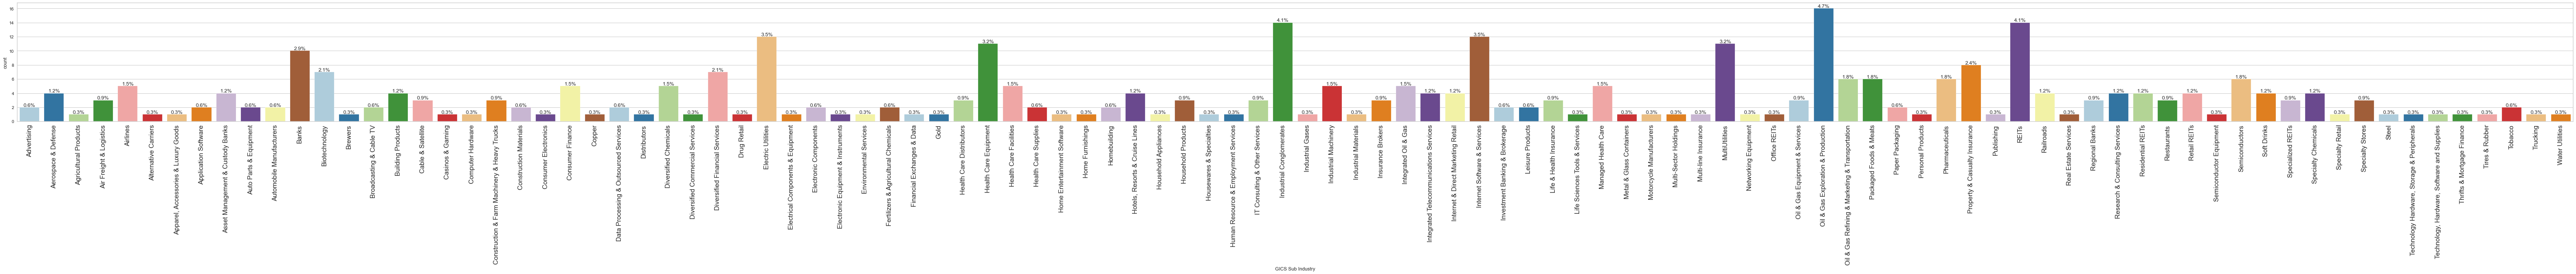

In [26]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

### Bivariate Analysis

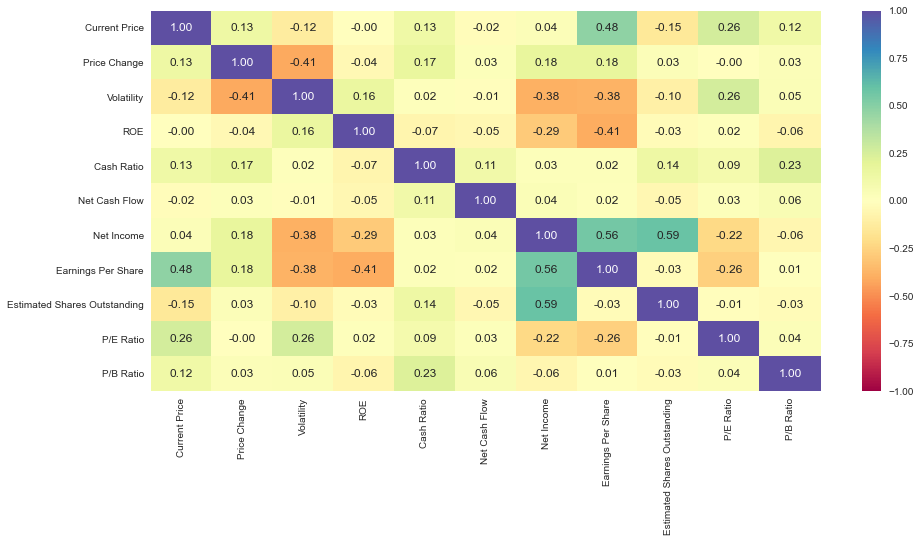

In [27]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Which economic sector have seen the maximum price increase on average?

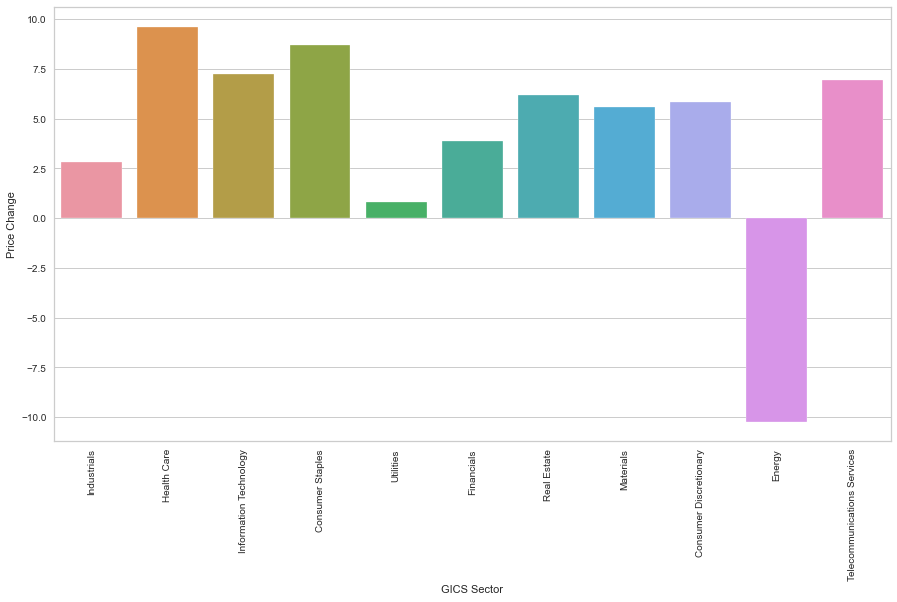

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

**Which economic sector have seen the maximum ROE on average?**

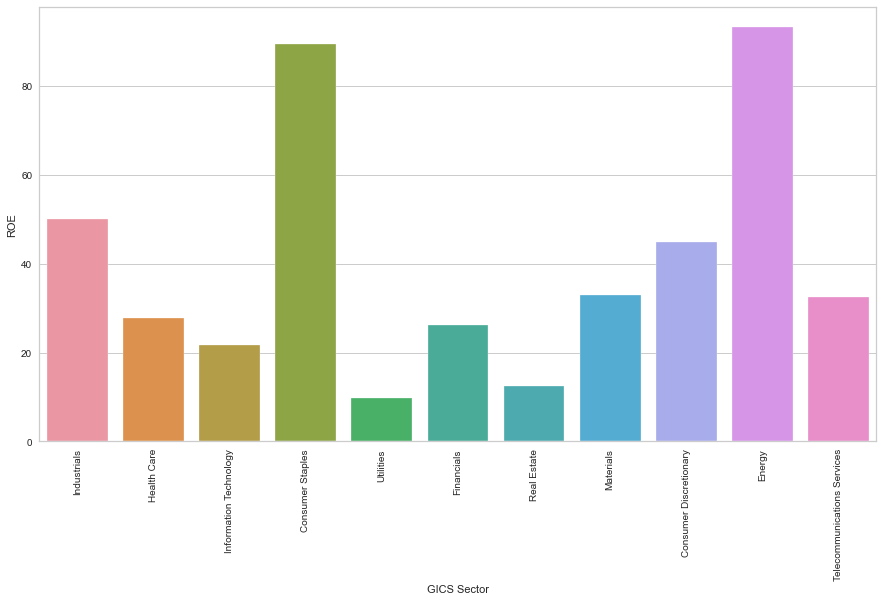

In [219]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='ROE', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

#### Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

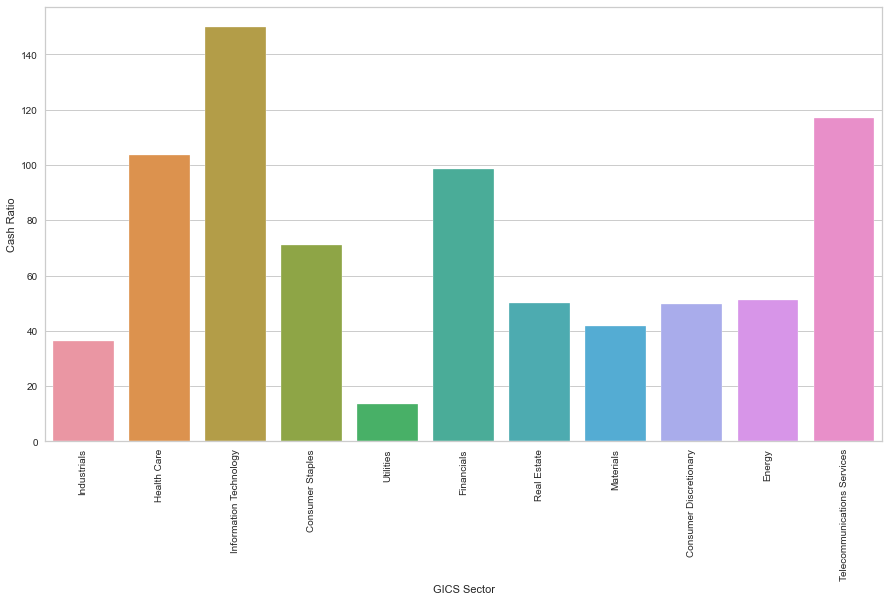

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

#### P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?
​

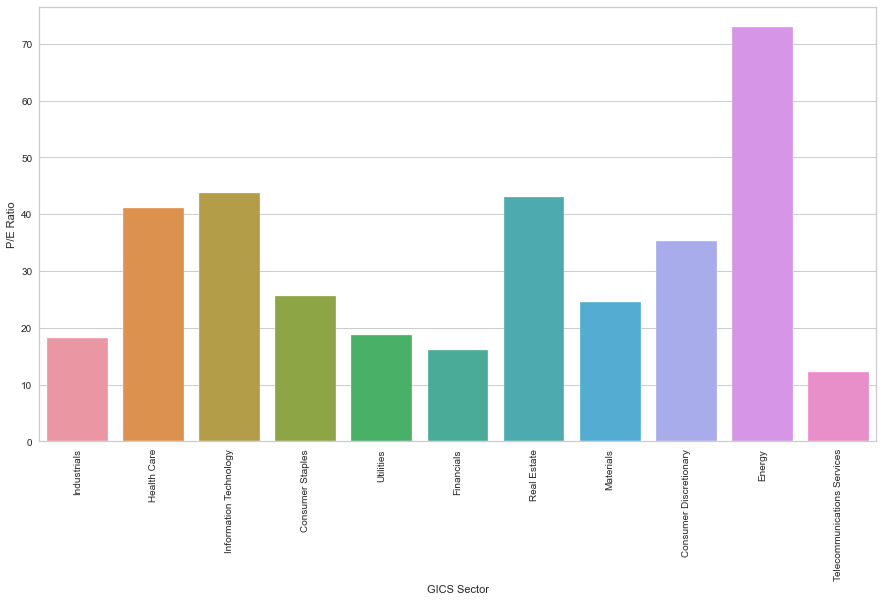

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

#### Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.

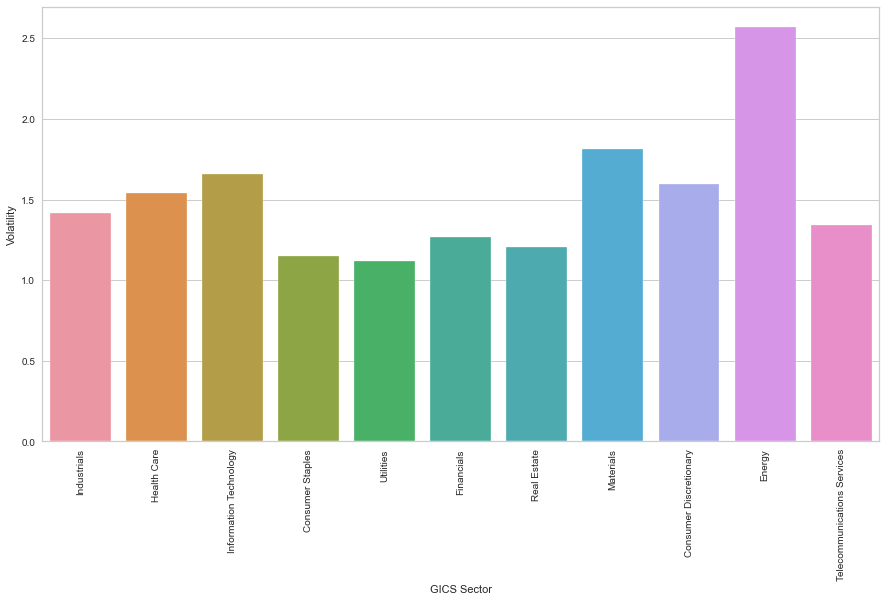

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

-     Observations:
    - Most numeric variables are normally distributted with a lot of outliers
    - Net income and Earnings per share have a good positive correlation
    - Energy sector has the highest level of volatility
    - The highest number of shares are associated with the Industrials and Financial sector
    - Energy and Consumer staple companies have the highest ROE
    
    

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [32]:
# checking for duplicate values
df.duplicated().sum() ## Complete the code to get total number of duplicate values

0

In [33]:
# missing value check
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

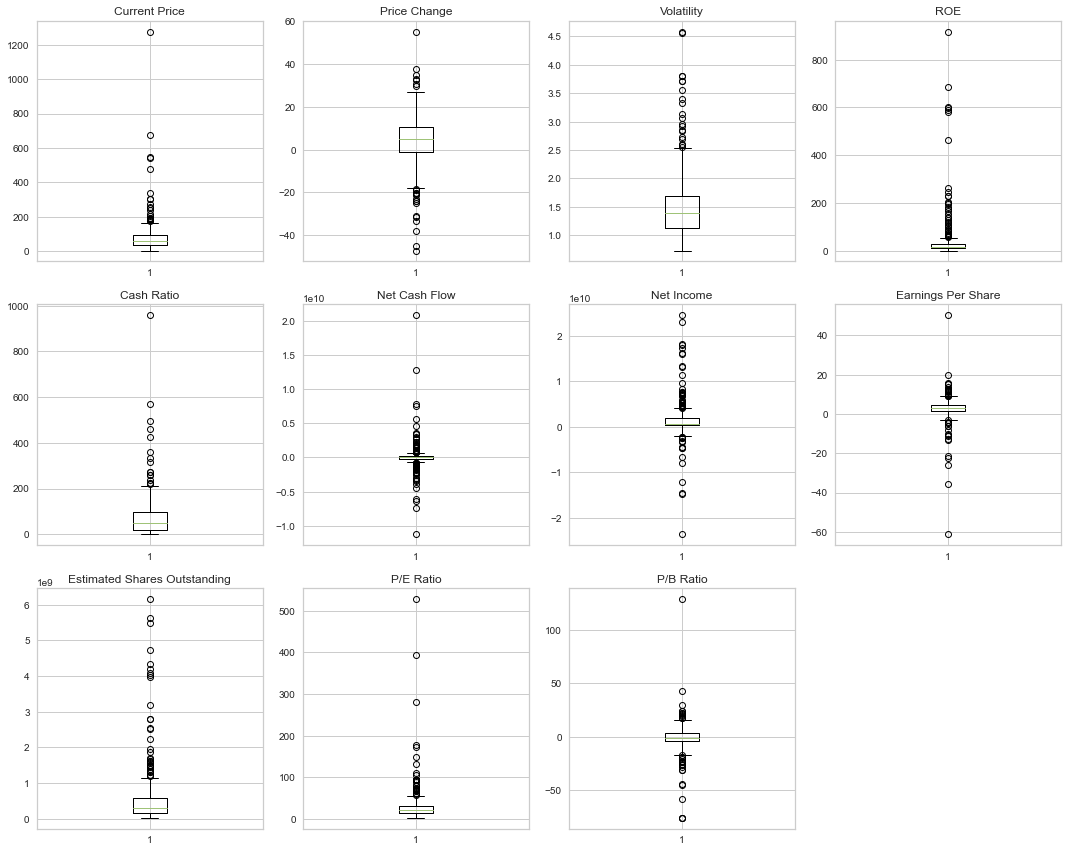

In [34]:
# Outlier check

plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

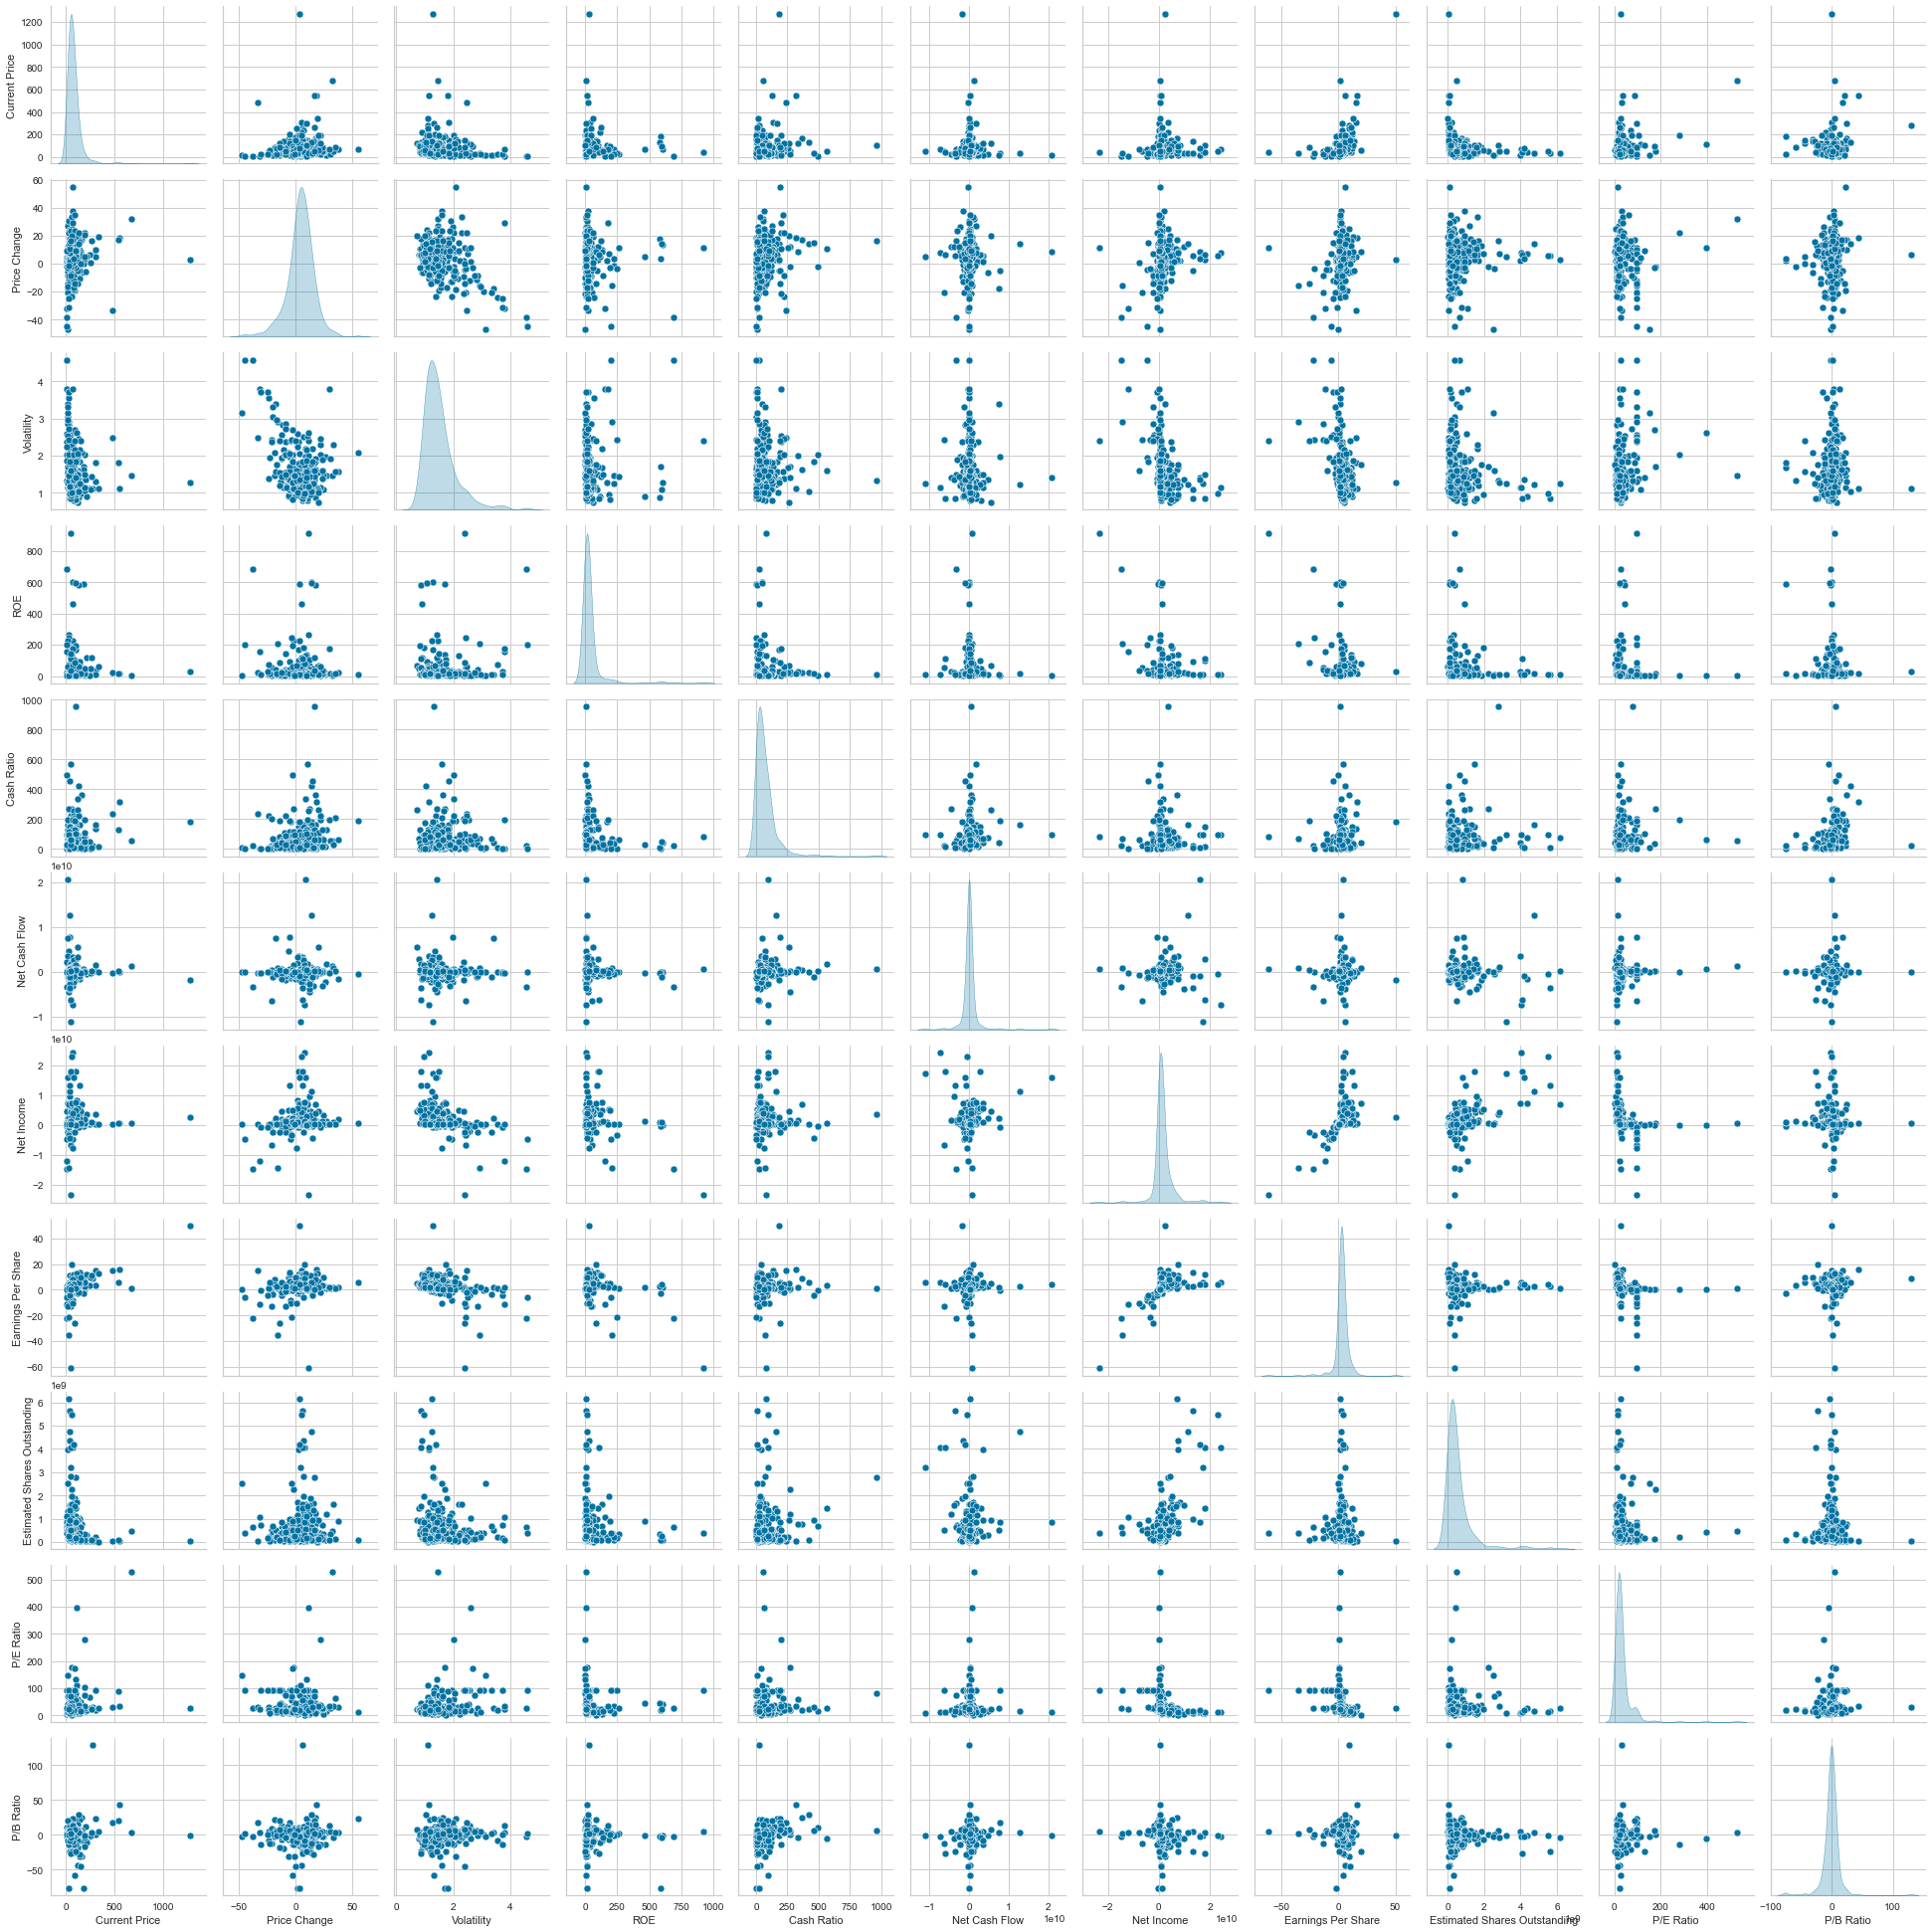

In [35]:
sns.pairplot(data=df[numeric_columns], diag_kind="kde")
plt.show()

## Scaling 
- Data needs to be scaled before we proceed with clustering

In [36]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [37]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [38]:
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## K-means Clustering

In [39]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


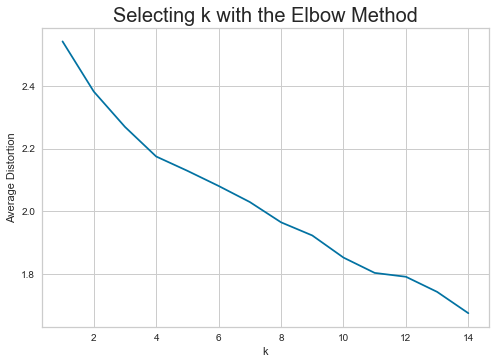

In [40]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**The appropriate values possible from the k from the elbow curve are 2, 4, 6, 8, 11 and 14**

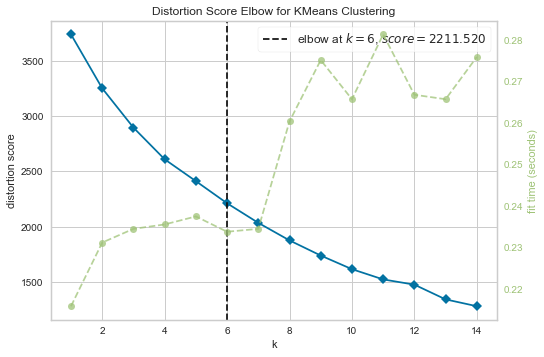

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

- The distortion score elbow is leaning towards 6 clusters

#### Let's check the silhouette scores.

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


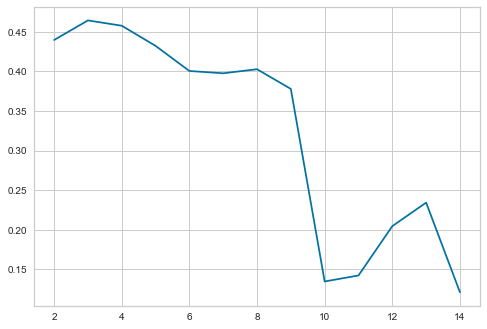

In [42]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**From the silhouette scores, it seems that 2, 3, 4, 6 and 8 seem like good values of k as they have the highest silhouette scores.**

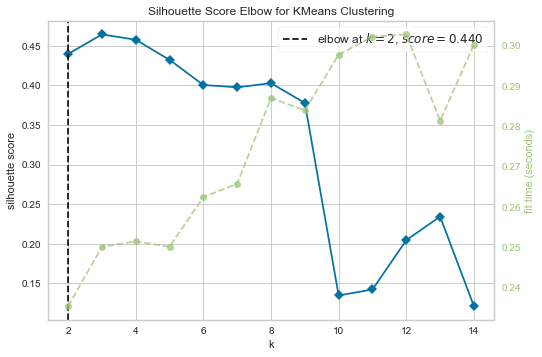

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [43]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

- The Silhouette score elbow is leaning towards 2 clusters

**for 2 clusters**

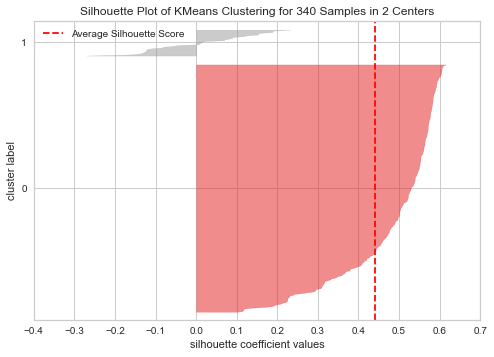

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

**for 4 clusters**

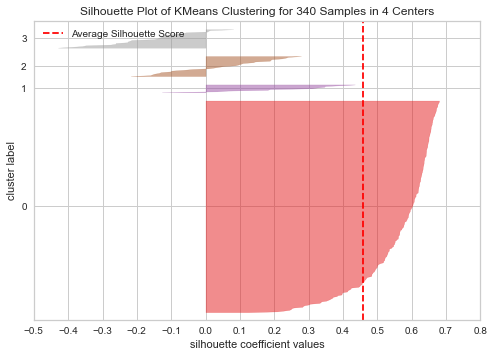

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

**for 6 clusters**

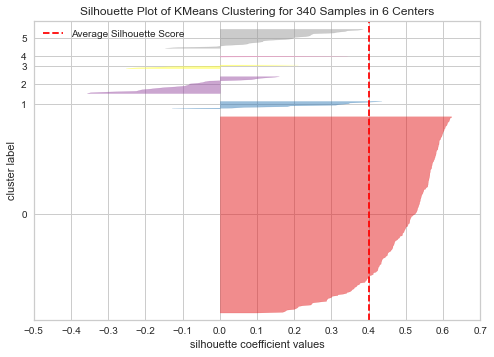

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

**For 8 clusters**

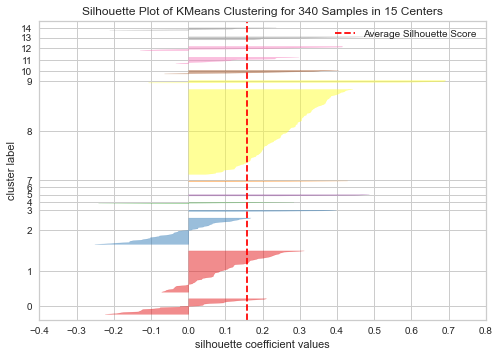

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 15 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [69]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(15, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

**for 10 clusters**

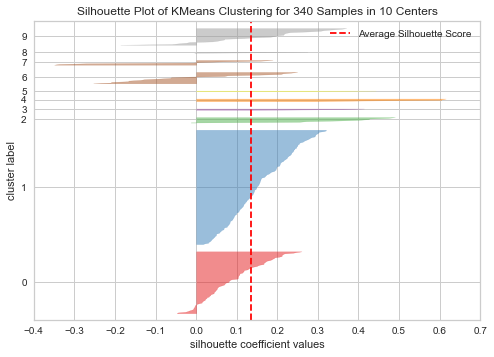

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [71]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(10, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

**for 14 clusters**

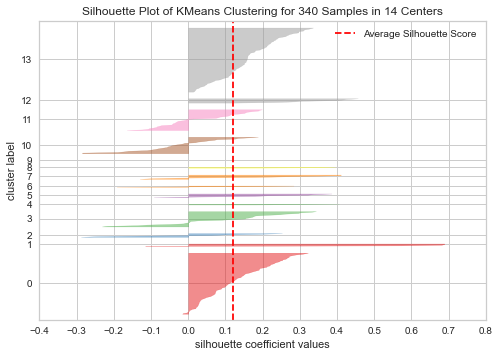

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 14 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [72]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(14, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

- Looking at the data there are over 340 uniquely identify publicly traded shares across 11 sectors that need to be grouped into clusters so a higher number of clusters would be ideal to provide a reliable grouping that can accurately reflect the broad array of clients.
- As such I would also look at the higer number of clusters and compare the visual results
- 10 and 14 clusters look OK so I'll choose 10 clusters

In [74]:
# final K-means model
kmeans = KMeans(n_clusters=10, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

KMeans(n_clusters=10, random_state=1)

In [75]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

In [76]:
df1.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,KM_segments
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775,6
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260,1
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449,1
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096,1
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068,0


In [78]:
Kmeans = KMeans(n_clusters=10, random_state=0)
Kmeans.fit(subset_scaled_df)

KMeans(n_clusters=10, random_state=0)

In [79]:
df["K_means_segments"] = Kmeans.labels_

In [80]:
cluster_profile = df.groupby("K_means_segments").mean()

In [81]:
cluster_profile["count_in_each_segment"] = (df.groupby("K_means_segments")["Current Price"].count().values
                                           )

In [82]:
# Lets see the cluster profiles
cluster_profile.style.highlight_max(color="Green", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,83.082001,0.240051,1.321516,28.484277,45.396226,109619081.761006,1874388805.031446,4.650409,380271186.520189,20.549021,-4.927912,159
1,59.713801,12.639144,1.471110,20.750000,64.741071,-108663089.285714,1139007437.500000,2.511339,520174383.131250,27.617941,-0.503338,112
2,35.263847,-16.175693,2.841300,49.769231,48.153846,-135215038.461538,-2525946153.846154,-6.514231,482428533.751538,77.817252,1.618150,26
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
4,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,5
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
6,89.124314,10.571348,1.826073,29.823529,344.470588,844445294.117647,958283058.823529,1.914118,828171163.663529,48.684688,9.215861,17
7,624.079986,2.395375,1.557535,22.400000,178.400000,-295455600.000000,969671800.000000,19.268000,57832481.588000,42.051273,41.645997,5
8,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2


## Hierarchical Clustering

In [83]:
hc_df = subset_scaled_df.copy()

In [84]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524588.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.792530720285.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correlatio

#### Let's explore different linkage methods with Euclidean distance only.

In [85]:
# list of linkage methods
linkage_methods =  ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


#### Let's view the dendrograms for the different linkage methods with Euclidean distance.

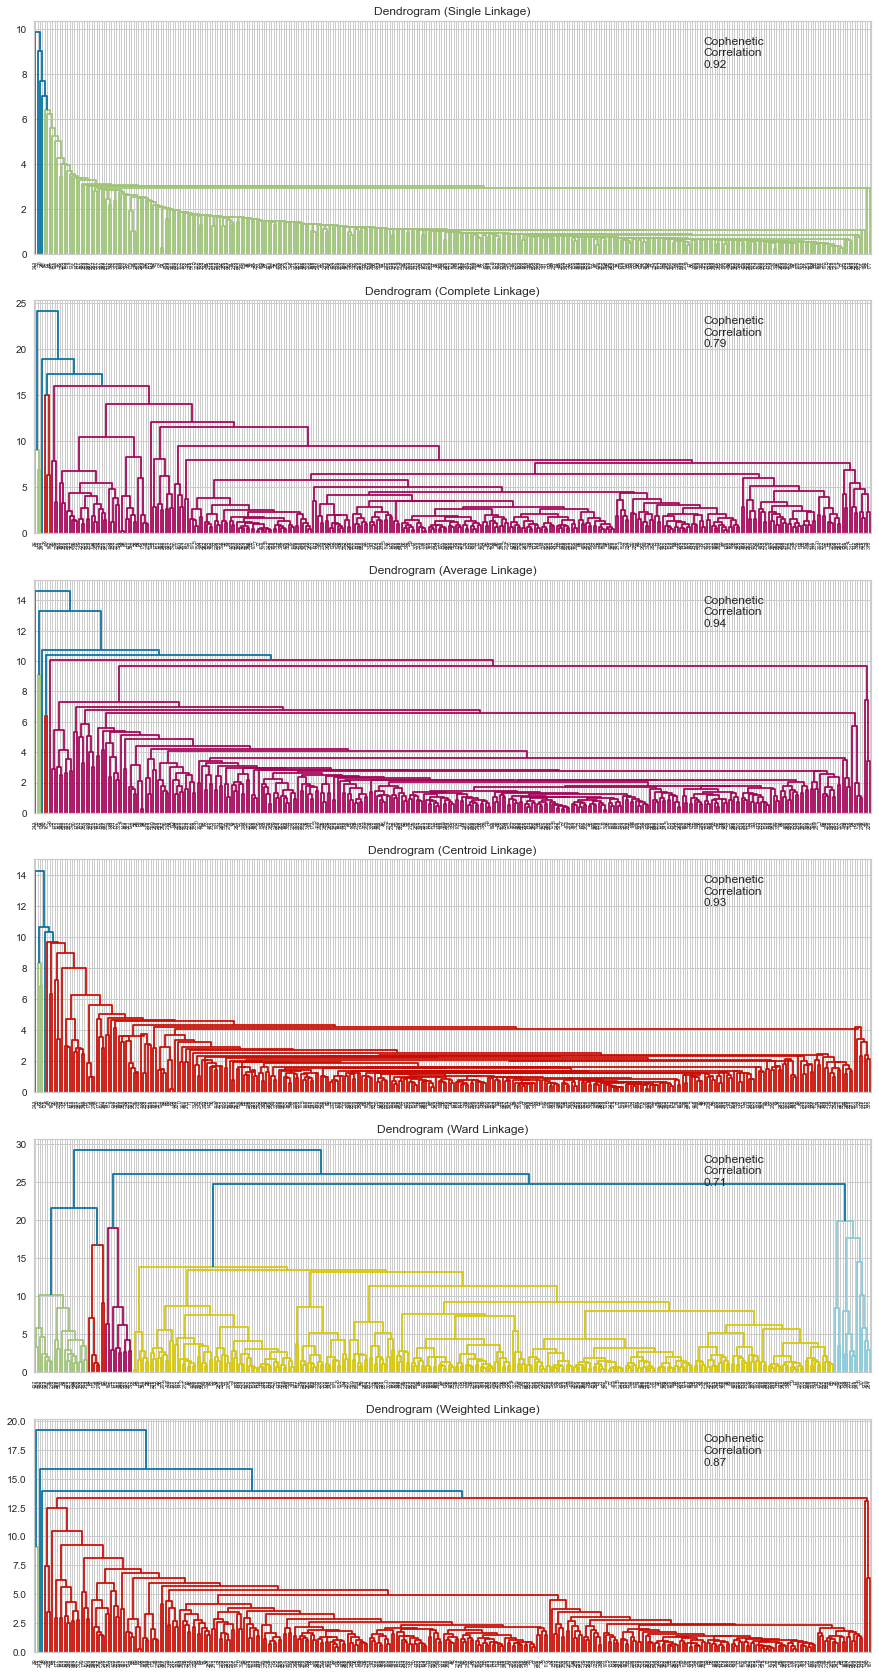

In [86]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [87]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


In [ ]:
**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will however go with ward linkage as it shows the most reasonable level of seperation.
- 25 appears to be the appropriate number of clusters from the dendrogram for ward linkage.

In [205]:
HCmodel = AgglomerativeClustering(n_clusters=25, affinity='euclidean', linkage='ward')  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=25)

In [206]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [207]:
hc_cluster_profile = df2.groupby("HC_segments").mean()  ## Complete the code to groupby the cluster labels

In [208]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [209]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segment
HC_segments,,,,,,,,,,,,,
0,74.934075,-12.702696,2.019152,15.333333,71.481481,-177497185.185185,356539481.481481,2.708889,244665494.524074,39.534981,5.439382,1.148148,27
1,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,4.000000,5
2,60.912351,14.662264,1.577162,17.296296,43.759259,-462880037.037037,1486810351.851852,2.933333,607238362.041111,25.897914,-1.312213,1.018519,54
3,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,8.000000,2
4,43.181428,4.821574,1.045998,29.571429,46.714286,-1259571428.571429,13136000000.000000,2.780000,4836796931.142858,17.126399,-7.733331,3.000000,7
5,120.149999,10.552059,2.110013,7.333333,177.333333,358947333.333333,321173000.000000,0.426667,960886084.633333,284.460034,-6.270582,5.333333,3
6,51.481250,-8.796306,2.369840,89.125000,64.500000,-978789000.000000,-5574662000.000000,-17.270000,366854620.330000,76.918948,0.712546,2.000000,8
7,132.794501,10.419252,1.162457,15.150000,48.200000,20707550.000000,806900550.000000,3.575500,219915657.503000,50.910398,-10.964572,0.500000,20
8,16.756250,-30.524515,3.611218,60.250000,11.875000,-222070875.000000,-2477074875.000000,-3.087500,777103489.137500,82.316914,-2.336984,2.000000,8


In [210]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 13, the following companies are present:
['American Airlines Group' 'The Walt Disney Company' 'Exelon Corp.'
 'Gilead Sciences' 'International Business Machines' "McDonald's Corp."
 'Mondelez International' 'Altria Group Inc' 'Northern Trust Corp.'
 'PepsiCo Inc.' 'Philip Morris International' 'Prudential Financial'
 'United Continental Holdings' 'United Health Group Inc.'
 'United Parcel Service' 'United Technologies']

In cluster 10, the following companies are present:
['AbbVie' 'Abbott Laboratories' 'AFLAC Inc'
 'American International Group, Inc.' 'Arthur J. Gallagher & Co.'
 'Allstate Corp' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Baxter International Inc.' 'BB&T Corporation'
 'The Bank of New York Mellon Corp.' 'BorgWarner'
 'Citizens Financial Group' 'Cincinnati Financial' 'Comerica Inc.'
 'CSX Corp.' 'Cognizant Technology Solutions'
 'Discover Financial Services' 'FLIR Systems' 'Fluor Corp.'
 'Flowserve Corporation' 'Corning Inc.' 'Garmin Ltd.'
 'Huntington Bancsha

In [211]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          4
             Consumer Staples                1
             Energy                          6
             Financials                      1
             Health Care                     3
             Industrials                     6
             Information Technology          3
             Materials                       3
1            Consumer Discretionary          1
             Consumer Staples                2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary         10
             Consumer Staples                3
             Energy                          3
             Financials                      3
             Health Care                    11
             Industrials                     9
             Information Technology          6
             Materials                       7
             Real E

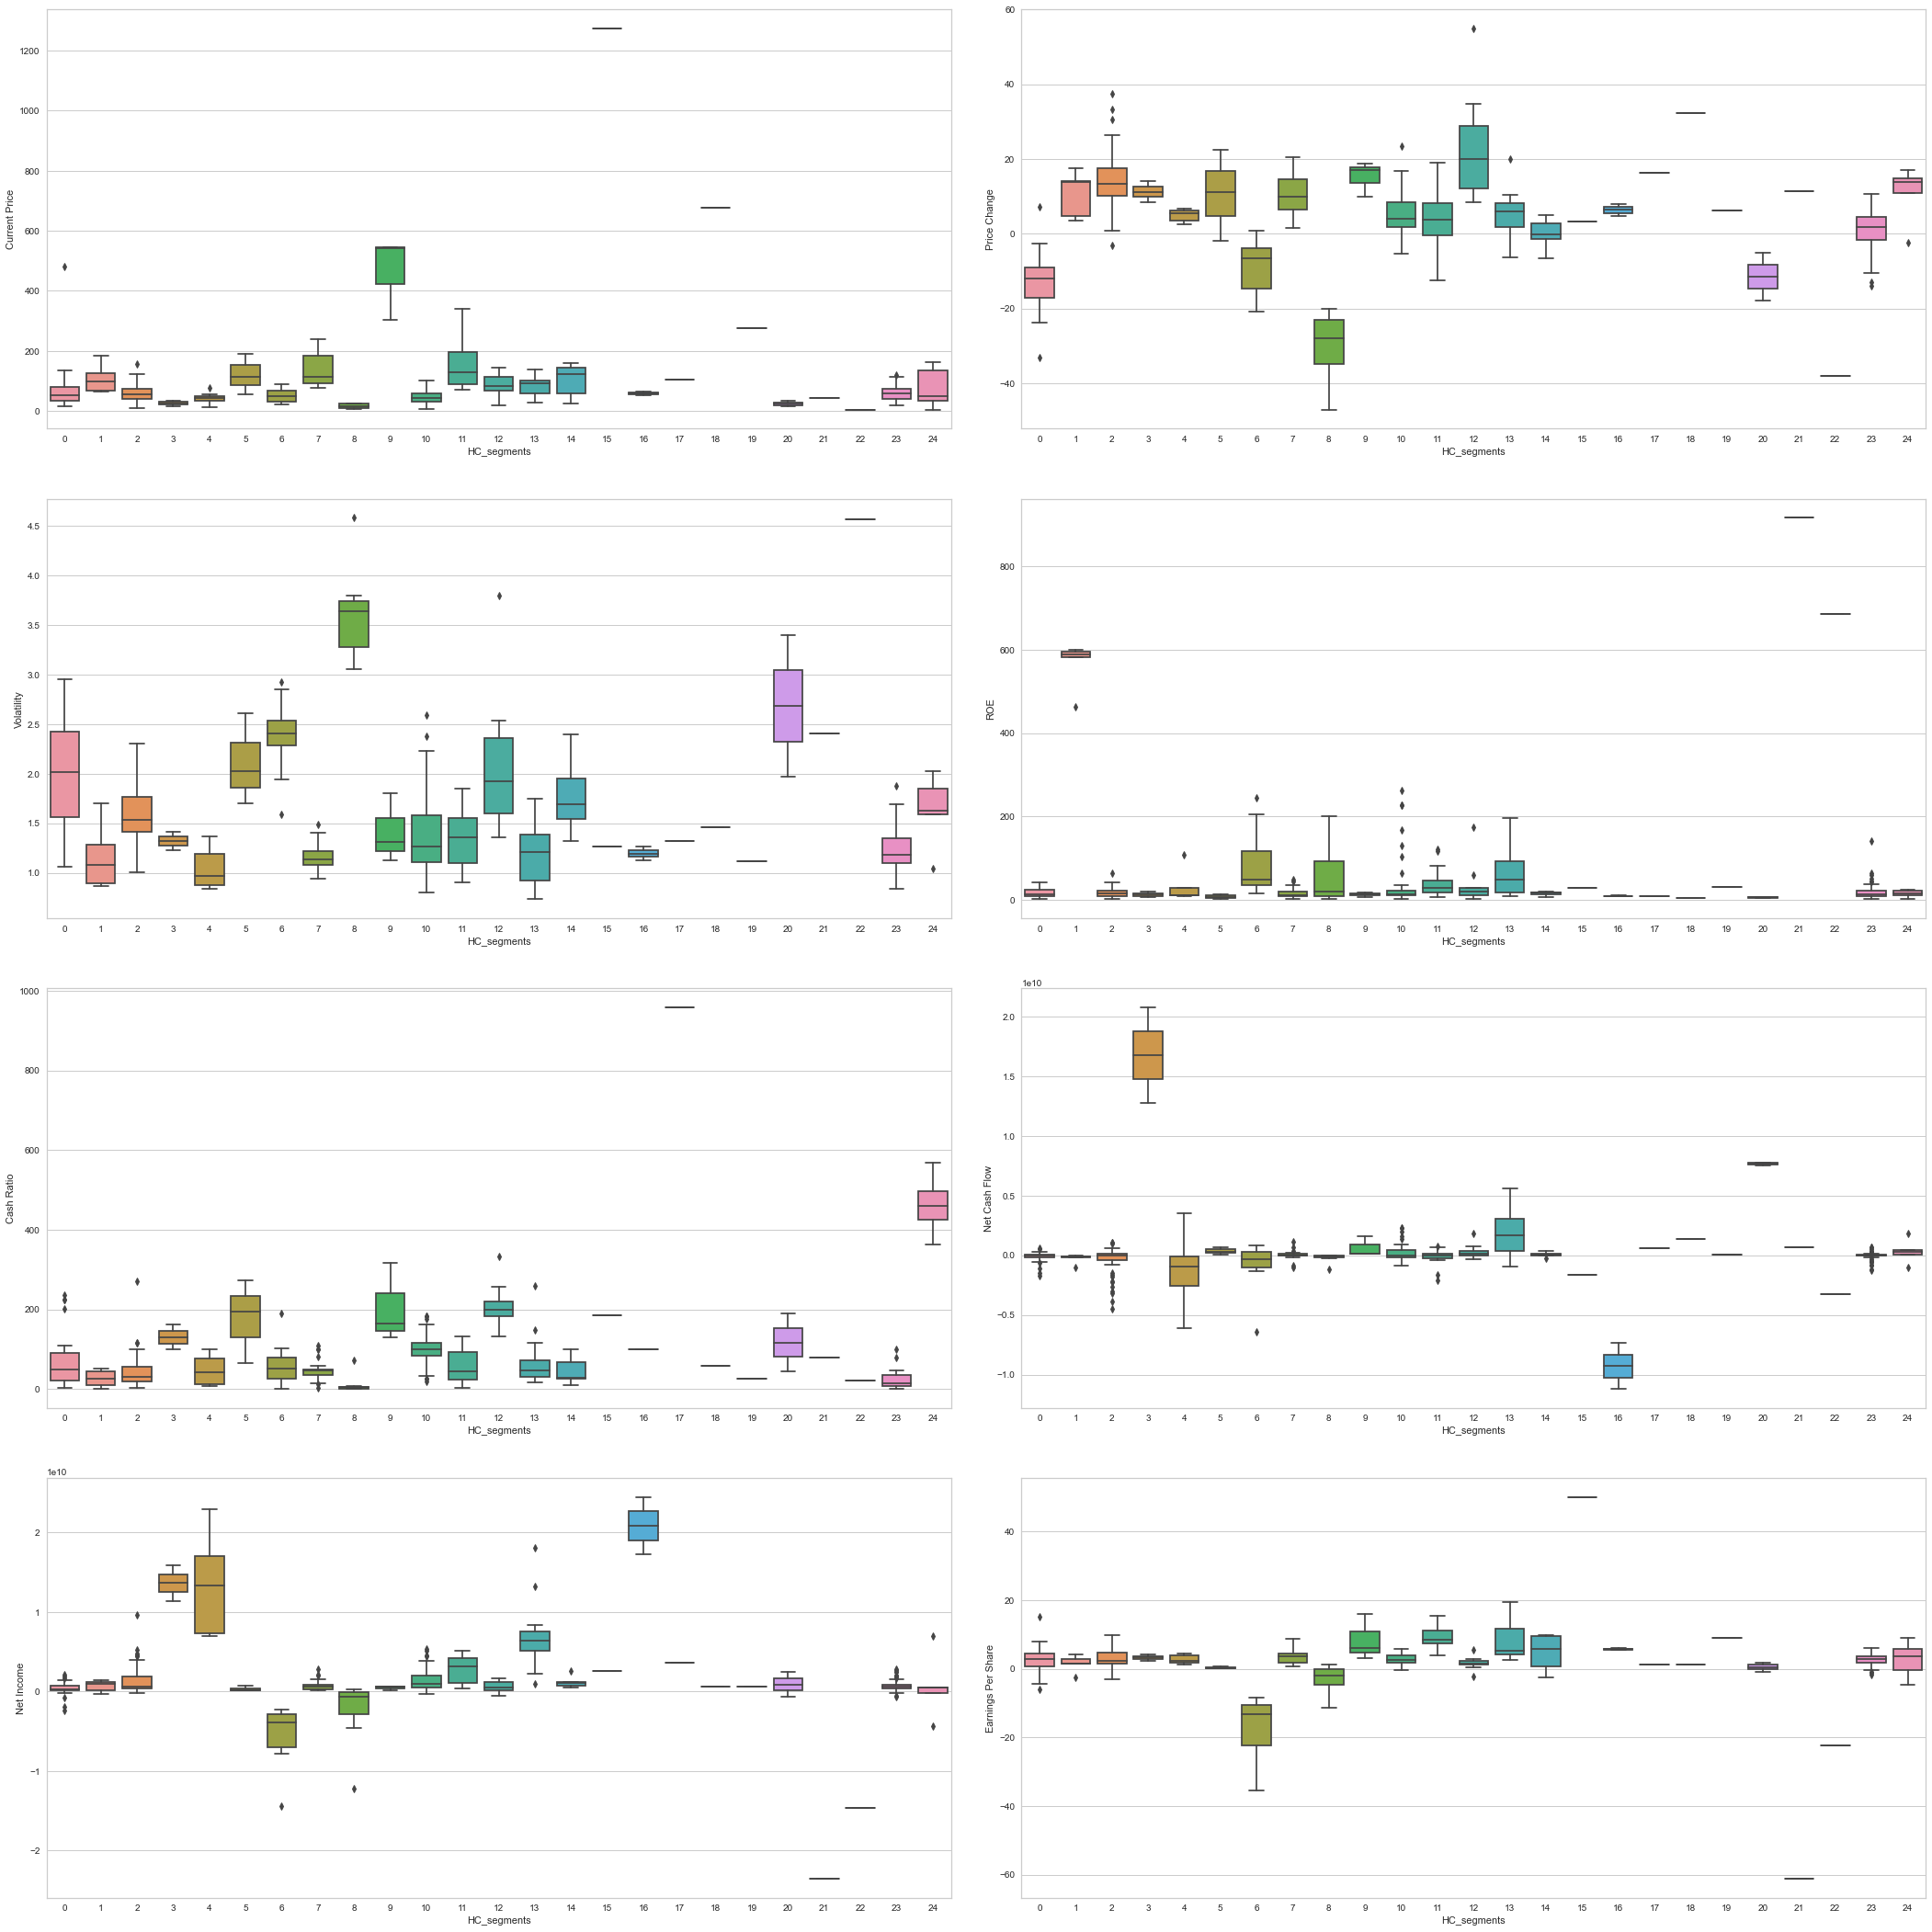

In [218]:
fig, axes = plt.subplots(4, 2, figsize=(30, 30))
counter = 0

for ii in range(4):
    for jj in range(2):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df2,
                y=df2.columns[4+counter],
                x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

## K-means vs Hierarchical Clustering

- The K-means clustering technique took less time for execution
- The K-means clustering technique gave more distinct clusters but the Heirachical techniques gave more flexibility and options to choose from
- How many observations are there in the similar clusters of both algorithms?
- 10 clusters were obtained as final result for K-means while 24 clusters were obtained for Heirachical clustering algorithm

We will look into the K-means clusters with top 3 number of  uniquely identify publicly traded shares which are clusters 0, 1, and 2

- **Cluster 0**
   - There are 159 publicly traded shares in this cluster.
   - The current price is 83.08
   - Volatility is 1.32
   - ROE is 28.48

- **Cluster 1**
   - There are 112 publicly traded shares in this cluster.
   - The current price is 59.7
   - Volatility is 1.47
   - ROE is 20.75

- **Cluster 2**
   - There are 26 publicly traded shares in this cluster.
   - The current price is 35.26
   - Volatility is 2.81
   - ROE is 49.7


We will look into the Heirachical clusters with top 3 number of  uniquely identify publicly traded shares which are clusters 2, 10, and 23

- **Cluster 2**
   - There are 26 publicly traded shares in this cluster.
   - The current price is 35.26
   - Volatility is 1.57
   - ROE is 17.29
   
   
- **Cluster 10**
   - There are 57 publicly traded shares in this cluster.
   - The current price is 463.8
   - Volatility is 1.39
   - ROE is 33.26 
   
   
- **Cluster 23**
   - There are 76 publicly traded shares in this cluster..
   - The current price is 58.9
   - Volatility is 1.25
   - ROE is 18.69


## Actionable Insights and Recommendations

- More time should be spent in understanding how the identified attributes can drive number of grouping for customers
- Wealthier customers with more experience in investing and more appetite for risk can be targeted for the higher price/moderate volatility clusters
- Middle/working class customers and pensioners with less appetite for risk who are relatively new to investing can be targetted for clusters with lower prices, lower volatility and moderate ROE to ensure a more secure longer term return